In [1]:
# Numpy and Pandas 
import numpy as np
import pandas as pd

# Vizualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Machine learning algorithms
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
# Machine learning pipeline 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Check the fitted_model
from sklearn.exceptions import NotFittedError

# Save python object to disk
import pickle

from keras import backend as K



import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [2]:
df = pd.read_csv(r"D:\Ram\MTech\Final_Year_Paper_Work\14226830\VAH22.csv")

In [3]:
df

,time_s,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C,cycleNumber,Ns,TimeDelta,soc
0,0.000000e+00,3.539573,1491.4921,0.000000,0.000000,0.000000,0.00000,24.575109,0,0,0.000000,0.000000
1,3.000000e+01,3.547016,1489.7195,0.044033,12.414182,0.000000,0.00000,24.677822,0,0,30.000001,0.006207
2,6.000000e+01,3.551938,1489.9165,0.088127,24.828216,0.000000,0.00000,25.136082,0,0,30.000001,0.012415
3,9.000000e+01,3.556428,1488.1439,0.132276,37.242144,0.000000,0.00000,25.246696,0,0,30.000001,0.018616
4,1.200000e+02,3.560917,1489.3257,0.176481,49.656028,0.000000,0.00000,25.057074,0,0,30.000001,0.024821
...,...,...,...,...,...,...,...,...,...,...,...,...
385424,4.399571e+06,3.549772,0.0000,8.439746,0.000000,-6.548237,1900.65198,20.798407,41,8,30.000003,0.007260
385425,4.399601e+06,3.549733,0.0000,8.439746,0.000000,-6.548237,1900.65198,20.932724,41,8,30.000003,0.007260
385426,4.399631e+06,3.549812,0.0000,8.439746,0.000000,-6.548237,1900.65198,21.019634,41,8,30.000003,0.007260
385427,4.399661e+06,3.549772,0.0000,8.439746,0.000000,-6.548237,1900.65198,20.727297,41,8,30.000003,0.007260


In [4]:
df=df.dropna()

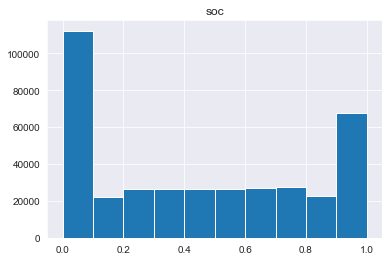

In [5]:
df.hist(column='soc')
plt.show()

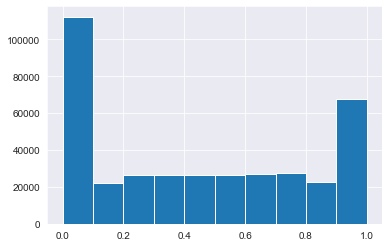

In [6]:
df.soc.hist()
plt.show()

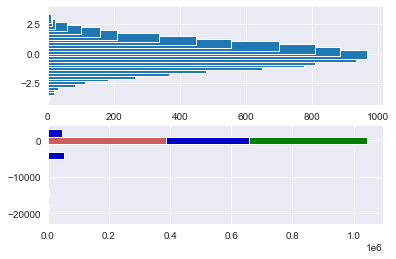

In [7]:
df1=df["Ecell_V"]
df2=df["I_mA"]
df3=df["soc"]
df4=df["Temperature__C"]

colors1 = ['indianred', 'mediumblue','green','black']
names = ['Voltage','SoC', 'Current', 'Temperature']

colors = ['indianred', 'mediumblue','green']
plt.hist([df1, df2, df3, df4], bins = int(180/15), stacked=True,
         color = colors1, label=names, orientation='horizontal')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%), Temperature')
plt.title('Voltage, Current, SoC')
sample=np.random.normal(size=10000)
vert_hist=np.histogram(sample,bins=30)
ax1=plt.subplot(2,1,1)
ax1.barh(vert_hist[1][:-1],vert_hist[0])
ax2=plt.subplot(2,1,2)
ax2.hist([df1, df2, df3], bins = int(180/15), stacked=True,
         color = colors, label=names,orientation='horizontal')
plt.show()

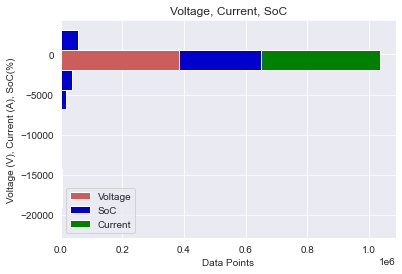

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Voltage, Current, SoC')

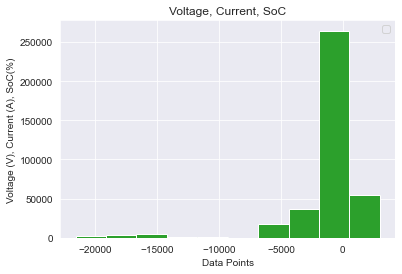

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig=plt.hist([df1, df2,df3], stacked=True,
         color = colors,label=names,orientation='horizontal')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%)')
plt.title('Voltage, Current, SoC',loc='center')


# ax.hist([df1, df2,df3], bins, orientation='horizontal')
plt.show()
plt.savefig('Data.jpeg', dpi=600)

plt.hist(df1)
plt.hist(df3)
plt.hist(df2)
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%)')
plt.title('Voltage, Current, SoC',loc='center')

In [9]:
y = df['soc']
X = df.drop(['Ns','cycleNumber','time_s','EnergyCharge_W_h', 'QCharge_mA_h', 'EnergyDischarge_W_h' ,'QDischarge_mA_h'], axis='columns')
print(X)

         Ecell_V       I_mA  Temperature__C  TimeDelta       soc
0       3.539573  1491.4921       24.575109   0.000000  0.000000
1       3.547016  1489.7195       24.677822  30.000001  0.006207
2       3.551938  1489.9165       25.136082  30.000001  0.012415
3       3.556428  1488.1439       25.246696  30.000001  0.018616
4       3.560917  1489.3257       25.057074  30.000001  0.024821
...          ...        ...             ...        ...       ...
385424  3.549772     0.0000       20.798407  30.000003  0.007260
385425  3.549733     0.0000       20.932724  30.000003  0.007260
385426  3.549812     0.0000       21.019634  30.000003  0.007260
385427  3.549772     0.0000       20.727297  30.000003  0.007260
385428  3.549772     0.0000       20.916922   3.392000  0.007260

[385429 rows x 5 columns]


In [10]:
print(y)

0         0.000000
1         0.006207
2         0.012415
3         0.018616
4         0.024821
            ...   
385424    0.007260
385425    0.007260
385426    0.007260
385427    0.007260
385428    0.007260
Name: soc, Length: 385429, dtype: float64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

X_train = np.expand_dims(np.array(X_train),1)
y_train = np.expand_dims(np.array(y_train),1)
X_test = np.expand_dims(np.array(X_test),1)
y_test = np.expand_dims(np.array(y_test),1)

#pipelines = {
#    'mlp'   : make_pipeline(StandardScaler(), MLPRegressor(random_state=1234))
#}
print(X_train)

[[[ 3.74001810e+00 -4.28827880e+03  3.02717690e+01  1.00000012e+01
    5.16475458e-01]]

 [[ 3.87710070e+00 -6.08738710e+02  2.38324090e+01  9.99999230e-01
    5.71655731e-01]]

 [[ 3.14612530e+00 -6.11299010e+02  2.29158880e+01  1.00000005e+00
    8.27353000e-05]]

 ...

 [[ 3.87095740e+00 -4.14372070e+03  3.28554120e+01  9.99999225e+00
    7.20208206e-01]]

 [[ 3.54922100e+00  0.00000000e+00  2.03954520e+01  3.00000031e+01
    7.26047100e-03]]

 [[ 4.19958500e+00  1.76681470e+02  2.43064730e+01  3.00000036e+01
    1.00000000e+00]]]


In [12]:
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
float64
float64
float64


In [13]:
from sklearn.preprocessing import MinMaxScaler
dataset = df.soc.values #numpy.ndarray
dataset = dataset.astype('float64')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [14]:
X_train.shape

(308343, 1, 5)

In [15]:
y_train.shape

(308343, 1)

In [16]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [16]:
import time
import psutil

start = time.time()

In [19]:
model = Sequential()
#model.add(LSTM(,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Activation("relu"))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001),metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=50), ModelCheckpoint(filepath='best_model0.h5', monitor='val_loss', save_best_only=True)], verbose=1, shuffle=False)
#scores = model.evaluate(X_test, Y_test, verbose=1)
#print("Accuracy: %.2f%%" % (scores[1]*100))
# Training Phase
model.summary()

Epoch 1/30
4818/4818 [==============================] - 27s 5ms/step - loss: 0.1449 - mean_absolute_error: 0.3056 - root_mean_squared_error: 0.3776 - val_loss: 0.0690 - val_mean_absolute_error: 0.2095 - val_root_mean_squared_error: 0.2627
Epoch 2/30
4818/4818 [==============================] - 23s 5ms/step - loss: 0.0709 - mean_absolute_error: 0.2206 - root_mean_squared_error: 0.2662 - val_loss: 0.0393 - val_mean_absolute_error: 0.1609 - val_root_mean_squared_error: 0.1983
Epoch 3/30
4818/4818 [==============================] - 22s 5ms/step - loss: 0.0453 - mean_absolute_error: 0.1686 - root_mean_squared_error: 0.2128 - val_loss: 0.0247 - val_mean_absolute_error: 0.1209 - val_root_mean_squared_error: 0.1571
Epoch 4/30
4818/4818 [==============================] - 23s 5ms/step - loss: 0.0394 - mean_absolute_error: 0.1466 - root_mean_squared_error: 0.1985 - val_loss: 0.0223 - val_mean_absolute_error: 0.1155 - val_root_mean_squared_error: 0.1495
Epoch 5/30
4818/4818 [======================

In [20]:
end = time.time()
print("Time taken:", end- start)

Time taken: 959.132660150528


In [21]:
print(psutil.Process().memory_info().peak_wset)

593412096


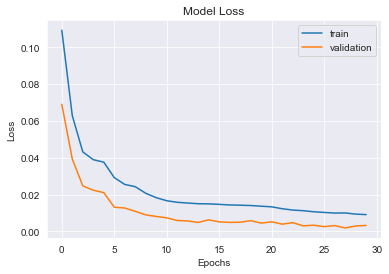

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

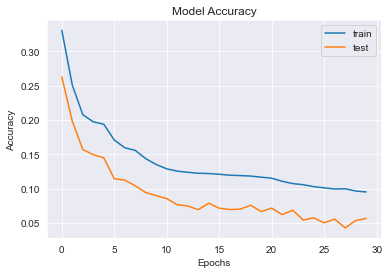

In [23]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [24]:
model.evaluate(X_test,y_test)

2409/2409 [==============================] - 2s 926us/step - loss: 0.0032 - mean_absolute_error: 0.0375 - root_mean_squared_error: 0.0567


[0.0032123723067343235, 0.03745448216795921, 0.056677792221307755]

In [17]:
import time
import psutil

start = time.time()

In [18]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=36, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(loss='mean_squared_error', optimizer='adam',metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()])
# Fitting to the training set
history = regressorGRU.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
#regressorGRU.summary()

Epoch 1/30
4818/4818 [==============================] - 10s 2ms/step - loss: 9675.1262 - mean_absolute_error: 23.4408 - root_mean_squared_error: 82.9468 - val_loss: 0.0369 - val_mean_absolute_error: 0.1474 - val_root_mean_squared_error: 0.1920
Epoch 2/30
4818/4818 [==============================] - 8s 2ms/step - loss: 0.0933 - mean_absolute_error: 0.1960 - root_mean_squared_error: 0.3032 - val_loss: 0.0355 - val_mean_absolute_error: 0.1331 - val_root_mean_squared_error: 0.1884
Epoch 3/30
4818/4818 [==============================] - 8s 2ms/step - loss: 0.0490 - mean_absolute_error: 0.1482 - root_mean_squared_error: 0.2212 - val_loss: 0.0598 - val_mean_absolute_error: 0.1884 - val_root_mean_squared_error: 0.2446
Epoch 4/30
4818/4818 [==============================] - 8s 2ms/step - loss: 0.1828 - mean_absolute_error: 0.2031 - root_mean_squared_error: 0.4132 - val_loss: 0.0763 - val_mean_absolute_error: 0.2302 - val_root_mean_squared_error: 0.2762
Epoch 5/30
4818/4818 [====================

In [19]:
end = time.time()
print("Time taken:", end- start)

Time taken: 744.1353104114532


In [20]:
print(psutil.Process().memory_info().peak_wset)

539521024


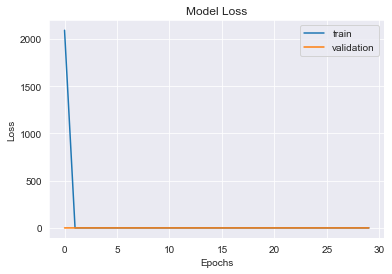

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

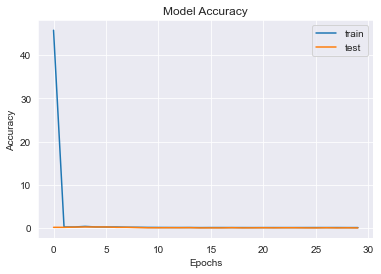

In [22]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [25]:
regressorGRU.evaluate(X_test,y_test)

2409/2409 [==============================] - 2s 824us/step - loss: 0.0031 - mean_absolute_error: 0.0398 - root_mean_squared_error: 0.0554


[0.0030746778938919306, 0.03978140279650688, 0.055449776351451874]